# HUGGING FACE COURSE

## WELCOME

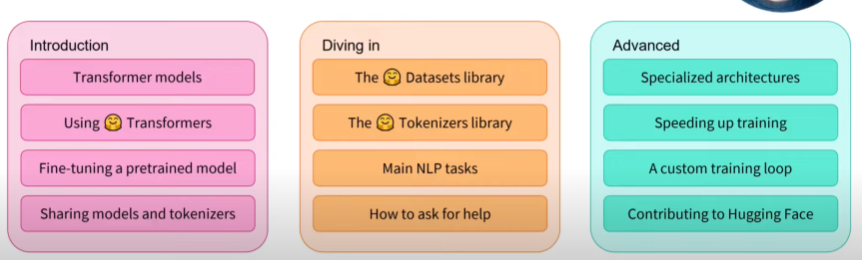


### The Pipeline function

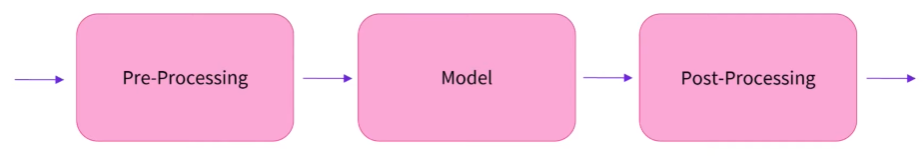

The pipeline function returns an end-to-end object that performs an NLP task on one or
several texts.

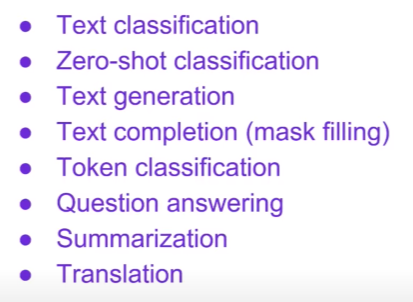

In [13]:
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"PyTorch version: {torch.__version__}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Current device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name(0)}")

CUDA available: True
PyTorch version: 2.5.1+cu121
CUDA version: 12.1
Current device: 0
Device name: NVIDIA GeForce RTX 3060 Laptop GPU


In [14]:
from transformers.utils import logging

logging.set_verbosity_error()

# Set logging level to display only error messages
# This helps reduce verbose output from the transformers library

In [15]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

classifier([
            "I've been waiting for a HuggingFace course my whole life.",
            "I am not a fan of this course",
            "I am not good at HuggingFace, so I am starting to learn it today!",
            "I am not good at HuggingFace",
            "I am starting to learn HuggingFace today!"
            ])


[{'label': 'POSITIVE', 'score': 0.9598045349121094},
 {'label': 'NEGATIVE', 'score': 0.9721255898475647},
 {'label': 'NEGATIVE', 'score': 0.9968169331550598},
 {'label': 'NEGATIVE', 'score': 0.9997554421424866},
 {'label': 'POSITIVE', 'score': 0.9683279991149902}]

* The zero-shot-classification pipeline lets you select the labels for classification.

In [16]:
classifier = pipeline("zero-shot-classification",)

classifier(
            "This is a course about the Transformers library",
            candidate_labels=["education", "politics", "business"],
)

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445958495140076, 0.1119765117764473, 0.04342762380838394]}

In [17]:
generator = pipeline("text-generation", model = "distilgpt2")
generator(
    "In this course, we will tech you how to",
    max_length=30,
    num_return_sequences=2,
)

[{'generated_text': 'In this course, we will tech you how to use your skills to build in-house development and learn more about it in the coming days. Our'},
 {'generated_text': 'In this course, we will tech you how to build and learn. So you go get a job and a job and get paid a little better than'}]

In [18]:
unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

[{'score': 0.1919848769903183,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.042092032730579376,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

* The NER Pipline identifies entities in a text sucgh as person, organization, location, date, time, etc.

In [19]:
ner = pipeline("ner", grouped_entities=True)
ner("My name is Sarah and I live in London.", aggregation_strategy="simple")

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\transformers\pipelines\token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.9976598,
  'word': 'Sarah',
  'start': 11,
  'end': 16},
 {'entity_group': 'LOC',
  'score': 0.99831945,
  'word': 'London',
  'start': 31,
  'end': 37}]

* Fill mask pipeline will predict missing words in a sentence. It is used for masked language modeling.

In [20]:
unmasker = pipeline("fill-mask")

unmasker("This course will teach you all about <mask> models.", top_k=2)

[{'score': 0.1919848769903183,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.042092032730579376,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

The NER pipeline indentifies such as person, organisations or location in a sentence

In [21]:
ner = pipeline("ner", grouped_entities=True, device=0)
ner("My name is Manas and I work at Hugging Face in Brooklyn.")

[{'entity_group': 'PER',
  'score': 0.9975622,
  'word': 'Manas',
  'start': 11,
  'end': 16},
 {'entity_group': 'ORG',
  'score': 0.97240114,
  'word': 'Hugging Face',
  'start': 31,
  'end': 43},
 {'entity_group': 'LOC',
  'score': 0.99336207,
  'word': 'Brooklyn',
  'start': 47,
  'end': 55}]

The Questioning answering pipeline extracts answers from a text given a question from a given context.

In [22]:
question_answerer = pipeline("question-answering")

question_answerer(
    question="Where do I work?",
    context="My name is Manas and I work at Hugging Face in Bareilly."
)


{'score': 0.6853626370429993,
 'start': 31,
 'end': 55,
 'answer': 'Hugging Face in Bareilly'}

The translation pipline traslates text from one language to another.

In [23]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")
translator("Ayushi is very beautiful, whould you like to go on a tea date with me?")

[{'translation_text': 'Ayushi est très belle, qui voudrais-tu aller à un rendez-vous de thé avec moi ?'}]

### The carbon footprint of transformers  
https://mlc02.github.io/impact/

## What is trasfer learning?

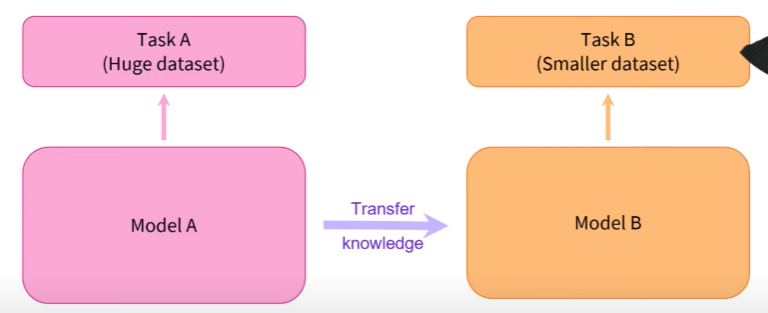

Transfer learning is the act of initializing a model with the weights of a pretrained model. This is done to take advantage of the knowledge that the pretrained model has learned from its training data.

# The Tranformers Architecture

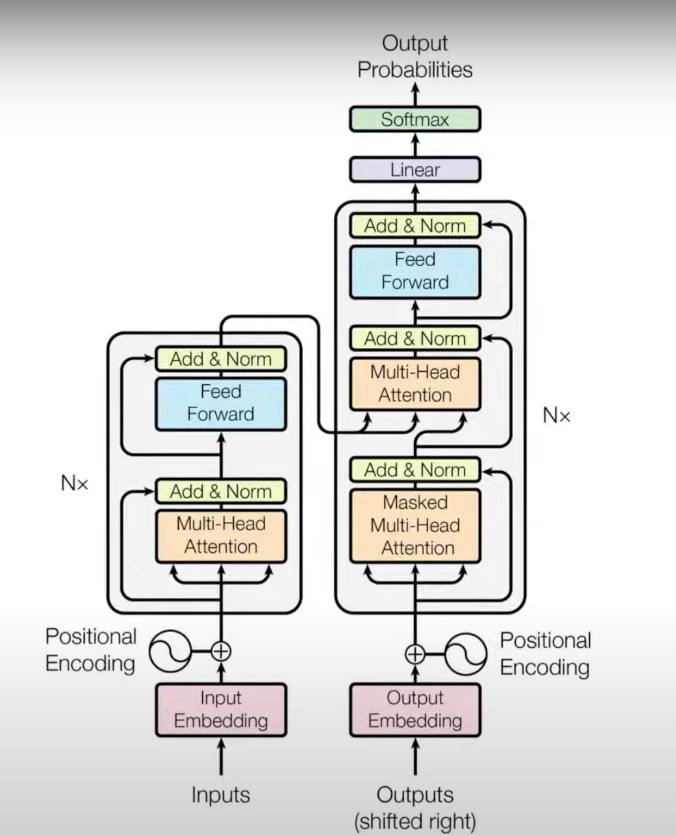 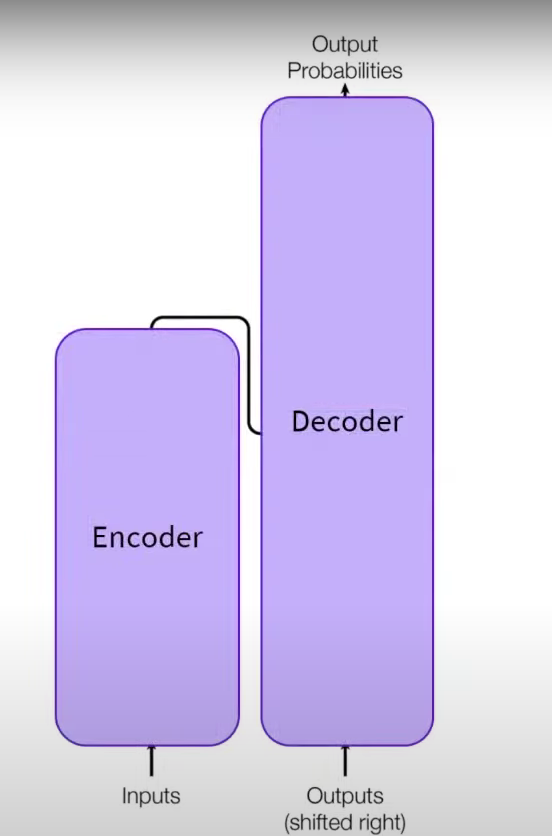

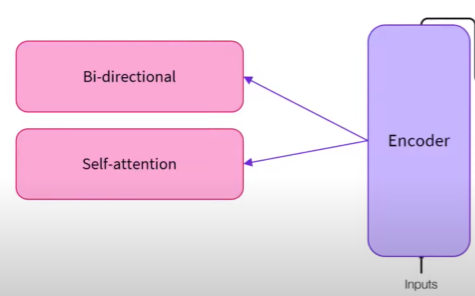  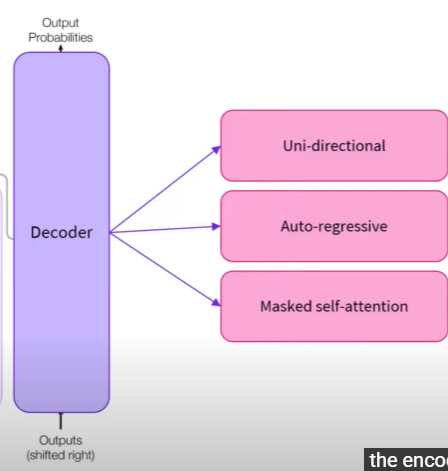


The Encoder "encodes" the text input into numerical representation.
The Decoder "decodes" the representaions from the encoder.

### Encoder

- The encoder outputs the numerical representaions for each word used as the input.
- The representaion is made up of vector of values for each word of the initial sequence.
- Each word is represented by a vector of 768 values. (in BERT models)
- Each word in the the initial sequence affects every word's representaion (it considers words around it known as context).
- Thanks to self attenction mechanism!

**Who should use the encoder?**
- Bi-derectional: conext from the left, and the right
- Good at extracting meaningful information
- Sequence classification, questioning answering, unmasked language modeling, token classification, etc.
- NLU: Natural Language Understanding
- Examples of encoders: BERT, RoBERTa, DistilBERT, ALBERT

1. **Masked Language modeling (MLM)**:  Guessing a randomly masked word in a sentence. 
 - Encoders, with the bi-directional context, are good at guessing words in the middle of a sequence.
 - This requires the semantic understanding as well as the synactic understanding of the sentence.
2. **Sentiment Analysis**: Analyzing the sentiment of a sequence
- Encoders are good at understanding of sequnces; and the relationship/indepence between words.

### Decoder

- The decoders outputs the numerical reresentaion from an initial sequence (this numerical can also be called as feature vector or featre tensor).
- The feature tensor is made up of a vector of values for each word of the initial sequence. (each of these vecorts are the numerical representation of the words in question)
- Words can only see the words on their left side; the words on the right side are hidden! (known as masked self attention) !!(decoders can have only single direction context either right or left)
**When to use the decoder?**
- Unidirectional: access to thier left (or right) context
- Great at casual tasks; generating sequences
- NLG: Natural Language Generation
- Examples of decoders: GPT-2, T5, BART, GPT Neo, etc.\
- **Causal Language Modeling (CLM)**: Guessing the next word in a sentence
    - Decoders, with their uni-directional context, are good at generating words given a context.


### Encoder-Decoder

The encoder genertes a numerical representaion.
The representaion is now used as the input for the decoder. 
Using this representaion and a prompt as the input, the decoder generates a word.
It then uses a combination of the representation and the word it is just generated to generate a second word, And a third word. That's the encoder-decoder!

When should I use a sequqnece-to-sequence model?
- Encoder-decoder models are great at generating sequences given a context.
- They are also great at understanding the relationship between the input and output sequences.
- Sequence to sequence tasks; many-to-many: translatio, summarisation
- Weights ar enot necessarily shared accross the encoder and decoder
- Input distribution different from the output distribution

Sequence-to-sequence models can be built from separate encoders and decoders.

### What happens inside the pipeline function?

```python
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
classifer(["I'have been waiting for you for my whole life.", "I hate leaving you so much."])

[{'label': 'POSITIVE', 'score': 0.9998}, {'label': 'NEGATIVE', 'score': 0.9998}]
```

The transformers are consist of three steps:

--> Tokeniser --> Model --> Post-Processing

Raw text --> Input IDs --> Logits --> Predictions

This course is ammazing --> [101, 2023, 2003, 1037, 1005, 1055, 2003, 2019, 102] --> [-4.3630, 4.6859] --> Positive: 99.89% , Negative: 0.11%

From text to numbers
Raw text --> Tokens --> Special tokens --> Input IDs
This course in amazing --> [this, course, is, amazing] --> [[CLS], this, course, is, amazing, [SEP]] --> [101, 2023, 2003, 1037, 1005, 1055, 2003, 2019, 102]


**Tokenizer**

The Auto tokenizer class can load the tokenizer from any checkpoint.
```python
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetunmed-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = ["This course is amazing", "I hate leaving you so much"]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)
```
`
{'input_ids': tensor([[  101,  2023,  2003,  1037,  1005,  1055,  2003, 2019,   102],
        [ 1012,   2018,   2129,   1996,   2017,   2064,   2017,   2054,
          2012,   2024,   2000,   2079,   102]]), 'attention_mask': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]])}
`


The tokenizer has added the special tokens [CLS] and [SEP] to the input IDs. The [CLS] token is used for classification tasks, while the [SEP] token is used to separate different sentences in a sequence. The tokenizer also returns the token type IDs, which indicate which tokens belong to which sentence in a sequence.

**Model**

The AutoModel class can load model without its pretraining head.

```python
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetunmed-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)
```
`torch.Size([2, 16, 768])`
The model returns the last hidden state of the input sequence. The last hidden state is a tensor of shape `(batch_size, sequence_length, hidden_size)`, where batch_size is the number of input sequences, sequence_length is the length of the input sequences, and hidden_size is the size of the hidden layers in the model.

`from transformers import AutoModelForSequenceClassification`
Each AutoModelForXXX class loads a model suitable for a specific task.

**Post-processing**

To go from logits to probabilities we apply softmax layer

```python
import torch
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)
```
`tensor([[0.9998, 0.0002], [0.0002, 0.9998]])`

`model.config.id2label`
`{0: 'NEGATIVE', 1: 'POSITIVE'}`

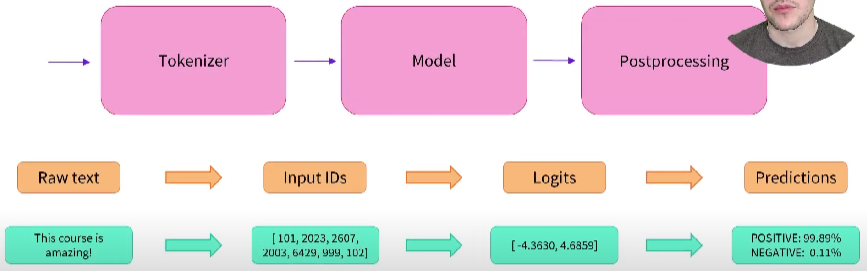



For Tenserflow

Model:

```python
from transformers import TFAutoModel

checkpoint = "distilbert-base-uncased-finetunmed-sst-2-english"
model = TFAutoModel.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)
```
`tf.TensorShape([2, 16, 768])`

The TFAutoModel class loads a model without it pretraining head.

`from transformers import TFAutoModelForSequenceClassification`

Each TFAutoModelForXXX class loads a model suitable for a specific task.

Post-processing:

```python
import tensorflow as tf
predictions = tf.nn.softmax(outputs.logits, axis=-1)
print(predictions)
```
`<tf.Tensor: shape=(2, 2), dtype=float32, numpy= array([[9.9980016e-01, 1.9980015e-04], [2.0019980e-04, 9.9980016e-01]], dtype=float32)>`






### Instantiating a Transformers model

The AutoModel allows you to instantiate a pretarined model from any checkpoint.

```python
from transformers import AutoModel

bert_model = AutoModel.from_pretrained("bert-base-uncased")
print(type(bert_model))

gpt_model = AutoModel.from_pretrained("gpt2")
print(type(gpt_model))

bart_model = AutoModel.from_pretrained("facebook/bart-large")
print(type(bart_model))
```

`<class 'transformers.models.bert.modeling_bert.BertModel'>`

`<class 'transformers.models.gpt2.modeling_gpt2.GPT2Model'>`

`<class 'transformers.models.bart.modeling_bart.BartModel'>`

Behind the AutoModel.from_pretrained method

```python
from transformers import BertConfig
bert_config = BertConfig.from_pretrained("bert-base-cased")
print(bert_config)
```

```
BertConfig {
    "_name_or_path": "bert-base-cased",
    "activation_function": "gelu",
    "architectures": [
      "BertForMaskedLM"
    ],
    "attention_probs_dropout_prob": 0.1,
    "bos_token_id": 101,
    "do_sample": false,
    "eos_token_id": 102,
    "hidden_act": "gelu",
    "hidden_dropout_prob": 0.1,
    "hidden_size": 768,
    "initializer_range": 0.02,
    "intermediate_size": 3072,
    "layer_norm_eps": 1e-12,
    "max_position_embeddings": 512,
    "max_seq_length": 512,
    "model_type": "bert",
    "num_attention_heads": 12,
    "num_hidden_layers": 12,    
    "num_hidden_groups": 1,
    "vocab_size": 28996,
    "type_vocab_size": 2,
    "use_cache": true,
}

**Same architecture as bert-base-cased**

```python
from transformers import BertConfig, BertModel

bert_config = BertConfig.from_pretrained("bert-base-cased")    
bert_model = BertModel(bert_config)
```

**Using only 10 layers instead of 12**

```python

from transformers import BertConfig, BertModel
bert_config = BertConfig.from_pretrained("bert-base-cased", num_hidden_layers=10)
bert_model = BertModel(bert_config)
```
Then you can instanstiate model with random weight from this configuration.

Saving a Model : ` bert_model.save_pretrained("my_model")`
Loading a Model : `BertModel.from_pretrained("my_model")`
Loading a Model with a different configuration : `BertModel.from_pretrained("my_model", config=bert_config)`
Reloading a saved model: `BertModel.from_pretrained("my_model", config=bert_config)`



In [24]:
###